# Stage 10a - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

df = pd.read_csv('../data/processed/VIX_S&P500_features.csv')
df.head()

,date,vix_close,vix_high,vix_low,vix_open,sp500_close,sp500_high,sp500_low,sp500_open,sp500_volume,log_sp500_close,vix_delta,vix_spread,sp500_delta,sp500_spread
0,2019-08-28,19.350000,21.639999,19.10,20.549999,2887.939941,2890.030029,2853.050049,2861.280029,3102480000,7.968299,-1.199999,2.539999,26.659912,36.979980
1,2019-08-29,17.879999,19.200001,17.60,19.020000,2924.580078,2930.500000,2905.669922,2910.370117,3177150000,7.980906,-1.140001,1.600000,14.209961,24.830078
2,2019-08-30,18.980000,19.180000,17.09,17.940001,2926.459961,2940.429932,2913.320068,2937.090088,3009910000,7.981549,1.039999,2.090000,-10.630127,27.109863
3,2019-09-03,19.660000,21.150000,19.41,20.959999,2906.270020,2914.389893,2891.850098,2909.010010,3427830000,7.974626,-1.299999,1.740000,-2.739990,22.539795
4,2019-09-04,17.330000,18.830000,17.26,18.230000,2937.780029,2938.840088,2921.860107,2924.669922,3167900000,7.985409,-0.900000,1.570000,13.110107,16.979980


In [9]:
# Baseline model fit with train-test split

X = df[['vix_close']]
y = df['log_sp500_close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'Baseline R² = {r2:.4f}, RMSE = {rmse:.6f}')

Baseline R² = 0.1931, RMSE = 0.187127


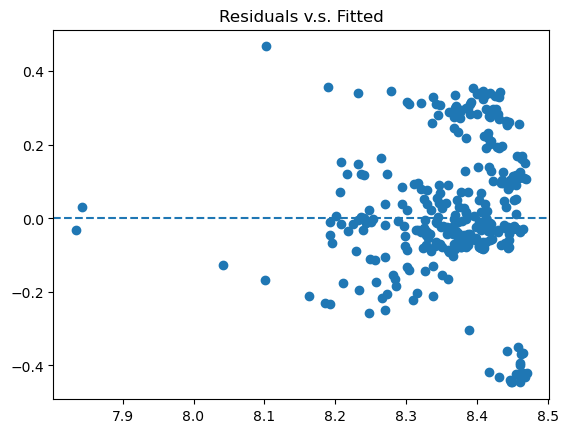

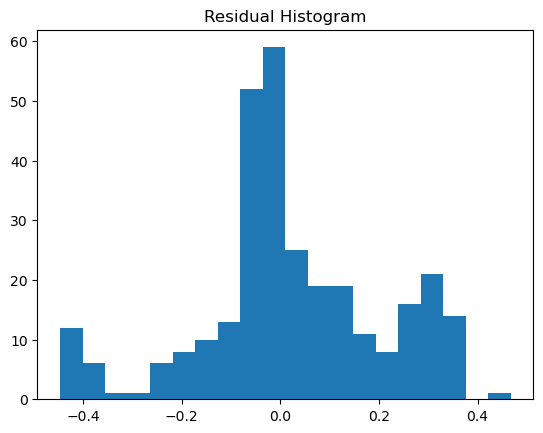

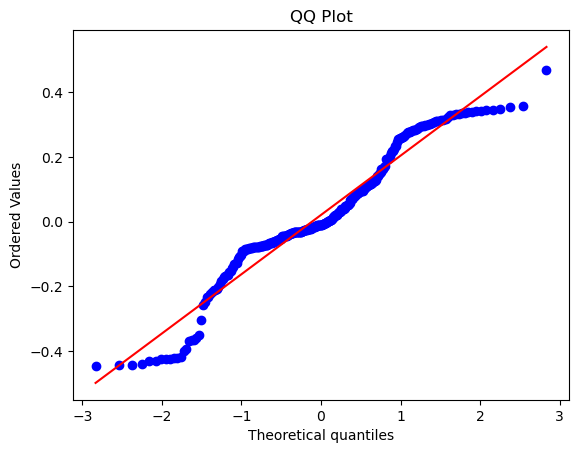

In [10]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls = '--'); plt.title('Residuals v.s. Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins = 20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist = 'norm', plot = plt); plt.title('QQ Plot'); plt.show()

In [17]:
# Transformed regression with delta

X = df[['vix_delta']]
y = df['sp500_delta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'Baseline R² = {r2:.4f}, RMSE = {rmse:.6f}')

Baseline R² = 0.3347, RMSE = 31.892257


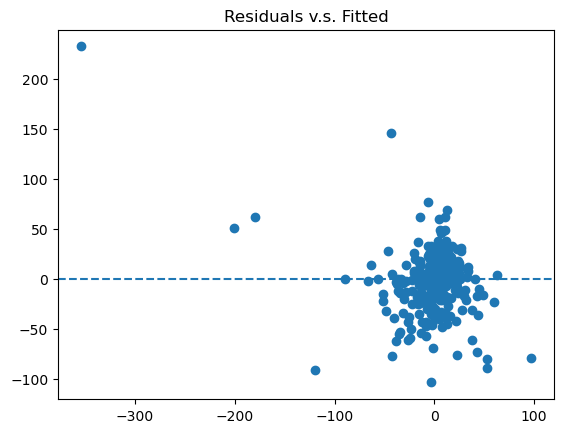

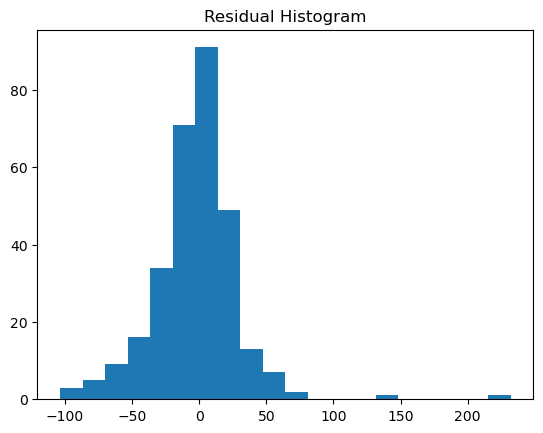

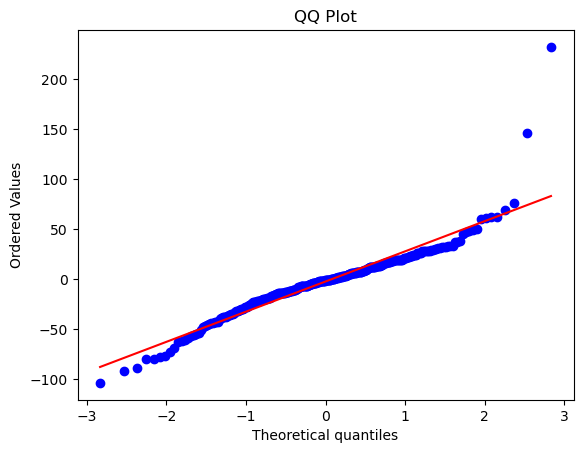

In [18]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls = '--'); plt.title('Residuals v.s. Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins = 20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist = 'norm', plot = plt); plt.title('QQ Plot'); plt.show()

In [19]:
# Transformed regression with spread

X = df[['vix_spread']]
y = df['sp500_spread']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'Baseline R² = {r2:.4f}, RMSE = {rmse:.6f}')

Baseline R² = 0.5961, RMSE = 28.499238


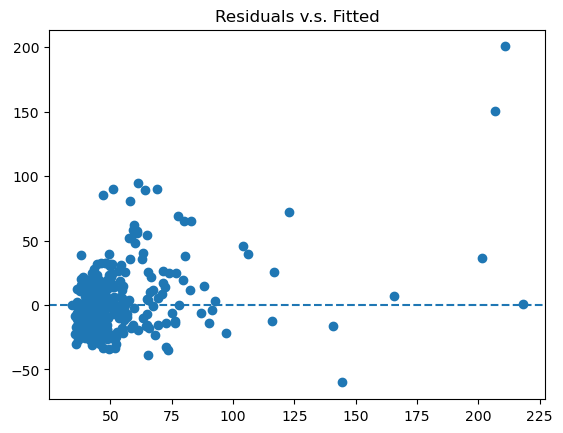

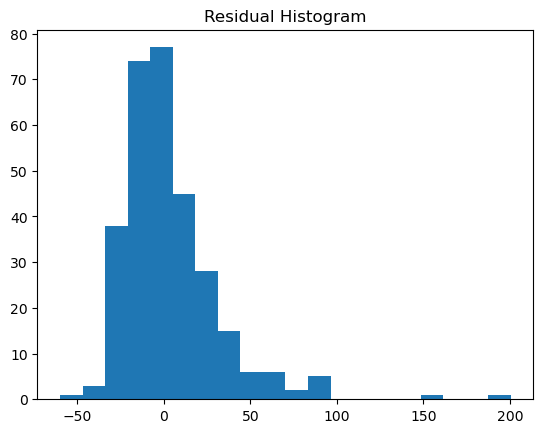

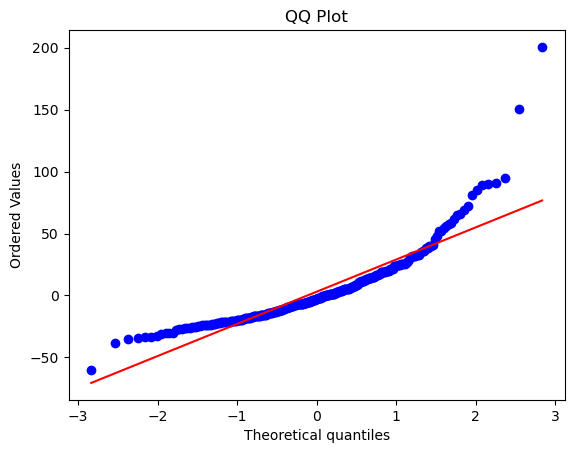

In [20]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls = '--'); plt.title('Residuals v.s. Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins = 20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist = 'norm', plot = plt); plt.title('QQ Plot'); plt.show()

## Modeling Assumptions

### Linearity of Relationship

- Assumes there is a linear relationship between the predictor and the response. 
- In practice, the link between volatility and returns may be nonlinear, which could limit the explanatory power of a linear specification.

### Independence of Errors

- Assumes residuals are independent from one observation to the next.
- For financial time series, this is often violated because data may exhibit autocorrelation (today’s residuals are related to yesterday’s), especially in returns and volatility clustering.

### Homoscedasticity

- Assumes the variance of residuals is constant across fitted values.
- In markets, volatility is itself time-varying: when the VIX spikes, variance in residuals is likely larger. Heteroskedasticity can bias standard errors and confidence intervals.

### Normality of Errors

- Assumes residuals are approximately normally distributed.
- Diagnostic plots test this assumption. In finance, return distributions often exhibit fat tails and skewness, meaning the assumption may not strictly hold.

### No Perfect Multicollinearity

- Assumes predictors are not exact linear combinations of each other.
- Since a single predictor is used at a time, this is not a concern. However, extending to multivariate regressions with multiple VIX-derived features would require checking for collinearity.

### Stationarity of Relationship

- Implicitly assumes the regression relationship is stable across the 5-year period.
- In reality, structural breaks (e.g. COVID-19) may shift the relationship between VIX and S&P 500, meaning one fitted model may not generalize across regimes.